# Title: Time series analysis of pm2.5 alongwith prediction model building 

In [1]:
#importing libraries to use them ahead
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('Ashish_lstm.csv',index_col='Date',parse_dates=True)
#Reading the data from the field
df = pd.read_csv('lstm_im.csv', index_col='date',parse_dates=True)
df.index.freq='H'
# df = pd.read_csv('lstm_im.csv', parse_dates=True, index_col='date',names=['date', 'pm2.5'], header=None, sep=',')

In [3]:
df.drop(df.iloc[:, 0:7], inplace = True, axis = 1) #This line removes the columns not required by us to predict in a univariate time series field
df.drop(df.tail(6).index, inplace = True) # Dropping the unnecesary additional imformation at the tail.
df

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


In [4]:
# df.head()

In [5]:
# df.tail(10)

In [6]:
# df.info()

In [7]:
# print("Rows    :" ,df.shape[0])
# print("columns :" ,df.shape[1])
# print("\nFeatures :", df.columns.tolist())
# print("\nMissing Values :",df.isnull().any())
# print("\nUnique Values :",df.nunique())

In [8]:
df.isnull().sum() #The total number of pm2.5 values which are zero actually 

pm2.5    742
dtype: int64

In [9]:
df[df['pm2.5'].isnull()] #Listing all the nan values of pm2.5

,pm2.5
date,
02-01-2018 21:00,NaN
03-01-2018 00:00,NaN
15-01-2018 00:00,NaN
21-01-2018 15:00,NaN
01-02-2018 10:00,NaN
...,...
13-09-2018 12:00,NaN
13-09-2018 13:00,NaN
13-09-2018 14:00,NaN


In [10]:
# df[df['pm2.5'].isnull()].count()

In [11]:
df.tail(12)

,pm2.5
date,
31-12-2018 12:00,9.2
31-12-2018 13:00,9.6
31-12-2018 14:00,8.1
31-12-2018 15:00,8.7
31-12-2018 16:00,5.3
31-12-2018 17:00,9.9
31-12-2018 18:00,16.3
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1


In [12]:
# df

In [ ]:

# import plotly.express as px
# fig = px.line(df, y='pm2.5', title='pm2.5 with slider')

# fig.update_xaxes(
#     rangeslider_visible = True,
#     rangeselector=dict(
#         buttons=list([
#             dict(step="all")
#         ]
#         )))  
# fig.show()

<AxesSubplot:xlabel='date'>

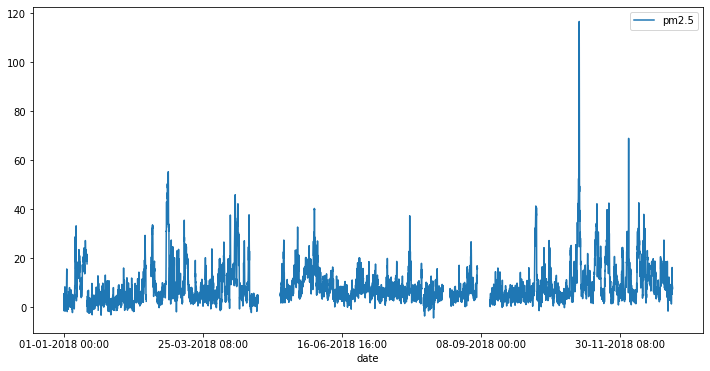

In [14]:
df.plot(y='pm2.5', figsize=(12,6))

In [15]:
# df = df.set_index['date']

In [16]:
# df.loc['01-01-2018 00:00':'01-02-2018 00:00']
df[0:745]

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-01-2018 20:00,2.6
31-01-2018 21:00,4.3
31-01-2018 22:00,3.5


In [17]:
df_na = df.copy()
# df_na = df_na.dropna()
df_na = df_na.dropna(subset=['pm2.5']) # we use this to drop the nan values we could have interpolate the null fiels but it will not have a large impact on the data 
df_na

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


<AxesSubplot:xlabel='date'>

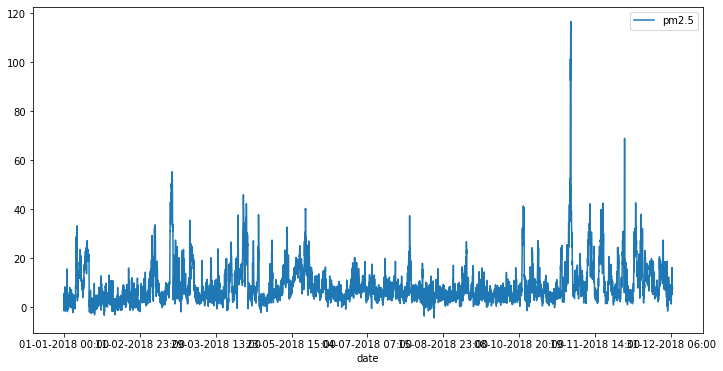

In [18]:
df_na.plot(figsize=(12,6),y='pm2.5')

 ### Now we will check for autocorrelation to know for seasonality 

The Autocorrelation plot for the data is:


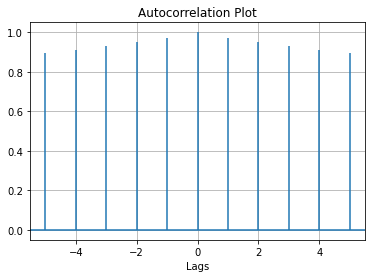

In [19]:
# pd.plotting.autocorrelation_plot(df_na['01-01-2018 00:00':'31-12-2018 23:00']['pm2.5'])
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(df_na['pm2.5'], maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [20]:
# df_na = pd.DataFrame(
#         {'Hours': pd.date_range('01-01-2018 00:00', '31-12-2018 23:00', freq='1H', closed='left')}
#      )
# df_na.head()
# df_na.tail()

# df_na.drop(df_na.tail(4).index,
#         inplace = True)
df_na
df_na.index.freq='H'

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

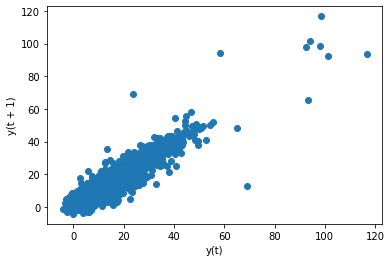

In [21]:
pd.plotting.lag_plot(df_na,lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

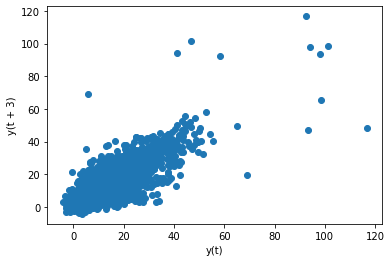

In [22]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

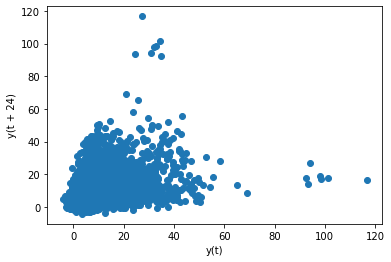

In [23]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 48)'>

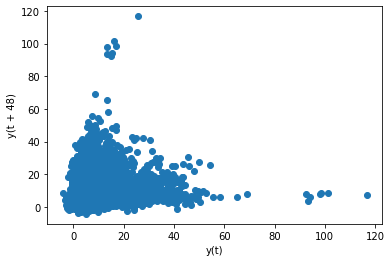

In [24]:
pd.plotting.lag_plot(df_na['pm2.5'],lag=48)

In [25]:
# from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
# results = seasonal_decompose(df_na['pm2.5'])
# results.plot();

In [27]:
len(df_na)

8018

In [28]:
df_na

,pm2.5
date,
01-01-2018 00:00,5.6
01-01-2018 01:00,1.6
01-01-2018 02:00,1.7
01-01-2018 03:00,0.8
01-01-2018 04:00,2.3
...,...
31-12-2018 19:00,8.8
31-12-2018 20:00,8.1
31-12-2018 21:00,8.9


In [29]:
# df_na.drop(columns =['Unnamed: 0', 'site', 'code','no2','no2_UT','pm10','pm10_UT'])
# df_na.drop(df.iloc[:, 0:7], inplace = True, axis = 1)
# df_na

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_na = scaler.fit_transform(np.array(df_na).reshape(-1,1))

In [31]:
df_na

array([[0.08181818],
       [0.04876033],
       [0.04958678],
       ...,
       [0.10909091],
       [0.09669421],
       [0.10082645]])

In [32]:
train_data = df_na[0:7000] #splitting the sample data into train data 
test_data = df_na[7000:len(df_na),:1] #splitting sample data into test data 

In [33]:
len(train_data),len(test_data)

(7000, 1018)

In [34]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #the lag we will use to actually predict the next data point and to also set the model.
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
print(X_train)

[[0.08181818 0.04876033 0.04958678 ... 0.06280992 0.06115702 0.0677686 ]
 [0.04876033 0.04958678 0.04214876 ... 0.06115702 0.0677686  0.0785124 ]
 [0.04958678 0.04214876 0.05454545 ... 0.0677686  0.0785124  0.09504132]
 ...
 [0.1661157  0.1785124  0.20165289 ... 0.10247934 0.09008264 0.08760331]
 [0.1785124  0.20165289 0.18760331 ... 0.09008264 0.08760331 0.07355372]
 [0.20165289 0.18760331 0.19504132 ... 0.08760331 0.07355372 0.07603306]]


In [37]:
print(X_test)

[[0.08181818 0.06280992 0.08842975 ... 0.18016529 0.22396694 0.24132231]
 [0.06280992 0.08842975 0.08099174 ... 0.22396694 0.24132231 0.27603306]
 [0.08842975 0.08099174 0.09669421 ... 0.24132231 0.27603306 0.30165289]
 ...
 [0.13471074 0.16859504 0.17520661 ... 0.11735537 0.17024793 0.10826446]
 [0.16859504 0.17520661 0.16694215 ... 0.17024793 0.10826446 0.10247934]
 [0.17520661 0.16694215 0.19008264 ... 0.10826446 0.10247934 0.10909091]]


In [38]:
# df_na.head(),df_na.tail()
print(X_train.shape), print(y_train.shape)

(6899, 100)
(6899,)


(None, None)

In [39]:
# df_na.head(),df_na.tail()
print(X_test.shape), print(y_test.shape)

(917, 100)
(917,)


(None, None)

### Creating stacked lstm

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# from 

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
108/108 [==============================] - 45s 418ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 2/60
108/108 [==============================] - 35s 322ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/60
108/108 [==============================] - 34s 311ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/60
108/108 [==============================] - 34s 315ms/step - loss: 9.8981e-04 - val_loss: 0.0013
Epoch 5/60
108/108 [==============================] - 34s 315ms/step - loss: 7.9718e-04 - val_loss: 0.0012
Epoch 6/60
108/108 [==============================] - 34s 314ms/step - loss: 7.1067e-04 - val_loss: 0.0012
Epoch 7/60
108/108 [==============================] - 35s 326ms/step - loss: 5.9776e-04 - val_loss: 0.0010
Epoch 8/60
108/108 [==============================] - 35s 324ms/step - loss: 5.6792e-04 - val_loss: 9.9906e-04
Epoch 9/60
108/108 [==============================] - 34s 311ms/step - loss: 5.0955e-04 - val_loss: 0.0012
Epoch 10/60
108/108 [========================

In [ ]:
print(hist.history.keys())

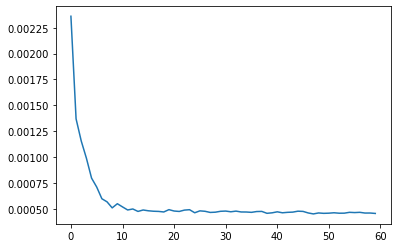

In [46]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [47]:
# import tensorflow as tf

In [48]:
# tf.__version__

In [49]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [50]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.082984247390742

In [52]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

12.997796221775003

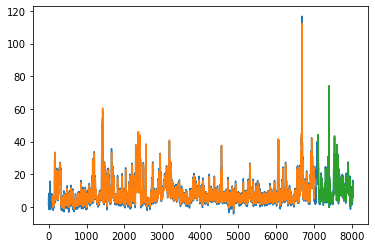

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_na)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_na)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_na)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_na))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

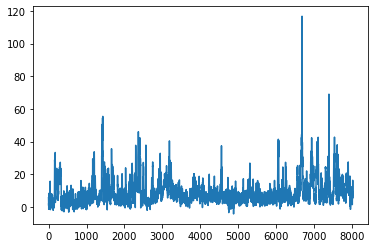

In [54]:
plt.plot(scaler.inverse_transform(df_na))

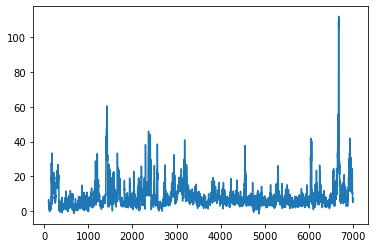

In [55]:
plt.plot(trainPredictPlot)


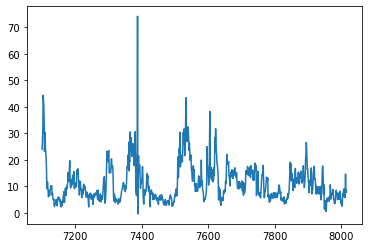

In [56]:
plt.plot(testPredictPlot)


In [57]:
len(test_data)

1018

In [58]:
x_input=test_data[518:].reshape(1,-1)
x_input.shape

(1, 500)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.21487603305785125,
 0.2206611570247934,
 0.22148760330578512,
 0.2066115702479339,
 0.243801652892562,
 0.2884297520661157,
 0.2892561983471074,
 0.3,
 0.30330578512396694,
 0.2694214876033058,
 0.22892561983471074,
 0.24297520661157027,
 0.27768595041322314,
 0.34297520661157027,
 0.38842975206611574,
 0.30661157024793384,
 0.27768595041322314,
 0.2644628099173554,
 0.2628099173553719,
 0.3057851239669422,
 0.29421487603305785,
 0.30082644628099175,
 0.2735537190082645,
 0.24545454545454545,
 0.2611570247933884,
 0.24545454545454545,
 0.21570247933884298,
 0.2206611570247934,
 0.22561983471074382,
 0.22396694214876034,
 0.1834710743801653,
 0.17768595041322316,
 0.15537190082644628,
 0.14049586776859505,
 0.1396694214876033,
 0.18925619834710747,
 0.19008264462809918,
 0.17355371900826447,
 0.1785123966942149,
 0.1487603305785124,
 0.12231404958677686,
 0.1231404958677686,
 0.10165289256198348,
 0.1090909090909091,
 0.13140495867768595,
 0.13140495867768595,
 0.10247933884297522,
 

In [61]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=500
i=0
while(i<200):
    
    if(len(temp_input)>500):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09816649]
501
1 day input [0.22066116 0.2214876  0.20661157 0.24380165 0.28842975 0.2892562
 0.3        0.30330579 0.26942149 0.22892562 0.24297521 0.27768595
 0.34297521 0.38842975 0.30661157 0.27768595 0.26446281 0.26280992
 0.30578512 0.29421488 0.30082645 0.27355372 0.24545455 0.26115702
 0.24545455 0.21570248 0.22066116 0.22561983 0.22396694 0.18347107
 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562  0.19008264
 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405  0.10165289
 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579
 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942
 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248
 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645
 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884
 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 

 0.09630804 0.09456224]
3 day output [[0.09311611]]
4 day input [0.24380165 0.28842975 0.2892562  0.3        0.30330579 0.26942149
 0.22892562 0.24297521 0.27768595 0.34297521 0.38842975 0.30661157
 0.27768595 0.26446281 0.26280992 0.30578512 0.29421488 0.30082645
 0.27355372 0.24545455 0.26115702 0.24545455 0.21570248 0.22066116
 0.22561983 0.22396694 0.18347107 0.17768595 0.1553719  0.14049587
 0.13966942 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033
 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959


5 day output [[0.0911599]]
6 day input [0.2892562  0.3        0.30330579 0.26942149 0.22892562 0.24297521
 0.27768595 0.34297521 0.38842975 0.30661157 0.27768595 0.26446281
 0.26280992 0.30578512 0.29421488 0.30082645 0.27355372 0.24545455
 0.26115702 0.24545455 0.21570248 0.22066116 0.22561983 0.22396694
 0.18347107 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562
 0.19008264 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405
 0.10165289 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438
 0.10330579 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901
 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.1

 0.09055267 0.09011427]
8 day output [[0.0897951]]
9 day input [0.26942149 0.22892562 0.24297521 0.27768595 0.34297521 0.38842975
 0.30661157 0.27768595 0.26446281 0.26280992 0.30578512 0.29421488
 0.30082645 0.27355372 0.24545455 0.26115702 0.24545455 0.21570248
 0.22066116 0.22561983 0.22396694 0.18347107 0.17768595 0.1553719
 0.14049587 0.13966942 0.1892562  0.19008264 0.17355372 0.1785124
 0.14876033 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496
 0.13140496 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182
 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983
 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099
 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438 0.06694215
 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554
 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107
 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 

10 day output [[0.08936551]]
11 day input [0.24297521 0.27768595 0.34297521 0.38842975 0.30661157 0.27768595
 0.26446281 0.26280992 0.30578512 0.29421488 0.30082645 0.27355372
 0.24545455 0.26115702 0.24545455 0.21570248 0.22066116 0.22561983
 0.22396694 0.18347107 0.17768595 0.1553719  0.14049587 0.13966942
 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033 0.12231405
 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496 0.10247934
 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744 0.15785124
 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298
 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438
 0.10413223 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306
 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942
 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628
 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653

12 day output [[0.08904722]]
13 day input [0.34297521 0.38842975 0.30661157 0.27768595 0.26446281 0.26280992
 0.30578512 0.29421488 0.30082645 0.27355372 0.24545455 0.26115702
 0.24545455 0.21570248 0.22066116 0.22561983 0.22396694 0.18347107
 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562  0.19008264
 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405  0.10165289
 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579
 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942
 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248
 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645
 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884
 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.185950

 0.08889067 0.0887248 ]
15 day output [[0.08854606]]
16 day input [0.27768595 0.26446281 0.26280992 0.30578512 0.29421488 0.30082645
 0.27355372 0.24545455 0.26115702 0.24545455 0.21570248 0.22066116
 0.22561983 0.22396694 0.18347107 0.17768595 0.1553719  0.14049587
 0.13966942 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033
 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.1595041

 0.08854606 0.08835374]
17 day output [[0.08814918]]
18 day input [0.26280992 0.30578512 0.29421488 0.30082645 0.27355372 0.24545455
 0.26115702 0.24545455 0.21570248 0.22066116 0.22561983 0.22396694
 0.18347107 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562
 0.19008264 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405
 0.10165289 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438
 0.10330579 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901
 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017

 0.08814918 0.08793509]
19 day output [[0.08771501]]
20 day input [0.29421488 0.30082645 0.27355372 0.24545455 0.26115702 0.24545455
 0.21570248 0.22066116 0.22561983 0.22396694 0.18347107 0.17768595
 0.1553719  0.14049587 0.13966942 0.1892562  0.19008264 0.17355372
 0.1785124  0.14876033 0.12231405 0.1231405  0.10165289 0.10909091
 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579 0.10578512
 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248
 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207
 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165

21 day output [[0.08727185]]
22 day input [0.27355372 0.24545455 0.26115702 0.24545455 0.21570248 0.22066116
 0.22561983 0.22396694 0.18347107 0.17768595 0.1553719  0.14049587
 0.13966942 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033
 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711

23 day output [[0.08684719]]
24 day input [0.26115702 0.24545455 0.21570248 0.22066116 0.22561983 0.22396694
 0.18347107 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562
 0.19008264 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405
 0.10165289 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438
 0.10330579 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901
 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 

25 day output [[0.0864606]]
26 day input [0.21570248 0.22066116 0.22561983 0.22396694 0.18347107 0.17768595
 0.1553719  0.14049587 0.13966942 0.1892562  0.19008264 0.17355372
 0.1785124  0.14876033 0.12231405 0.1231405  0.10165289 0.10909091
 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579 0.10578512
 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248
 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207
 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.1371900

27 day output [[0.08612198]]
28 day input [0.22561983 0.22396694 0.18347107 0.17768595 0.1553719  0.14049587
 0.13966942 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033
 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405 

29 day output [[0.08583285]]
30 day input [0.18347107 0.17768595 0.1553719  0.14049587 0.13966942 0.1892562
 0.19008264 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405
 0.10165289 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438
 0.10330579 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901
 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0

31 day output [[0.08558914]]
32 day input [0.1553719  0.14049587 0.13966942 0.1892562  0.19008264 0.17355372
 0.1785124  0.14876033 0.12231405 0.1231405  0.10165289 0.10909091
 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579 0.10578512
 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248
 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207
 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.0644628

33 day output [[0.08538392]]
34 day input [0.13966942 0.1892562  0.19008264 0.17355372 0.1785124  0.14876033
 0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322

35 day output [[0.0852097]]
36 day input [0.19008264 0.17355372 0.1785124  0.14876033 0.12231405 0.1231405
 0.10165289 0.10909091 0.13140496 0.13140496 0.10247934 0.1107438
 0.10330579 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901
 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0

37 day output [[0.0850597]]
38 day input [0.1785124  0.14876033 0.12231405 0.1231405  0.10165289 0.10909091
 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579 0.10578512
 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248
 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207
 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083

39 day output [[0.08492866]]
40 day input [0.12231405 0.1231405  0.10165289 0.10909091 0.13140496 0.13140496
 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182 0.14710744
 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231
 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405
 0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686 

 0.08486899 0.08481275]
42 day output [[0.08475962]]
43 day input [0.10909091 0.13140496 0.13140496 0.10247934 0.1107438  0.10330579
 0.10578512 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942
 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248
 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645
 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884
 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842

44 day output [[0.08466192]]
45 day input [0.13140496 0.10247934 0.1107438  0.10330579 0.10578512 0.11818182
 0.14710744 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983
 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099
 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438 0.06694215
 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554
 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107
 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041
 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149
 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595
 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.113223

46 day output [[0.08457452]]
47 day input [0.1107438  0.10330579 0.10578512 0.11818182 0.14710744 0.15785124
 0.15371901 0.13966942 0.11570248 0.12561983 0.14132231 0.13884298
 0.12479339 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438
 0.10413223 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306
 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942
 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628
 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273
 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917
 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661
 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512

49 day input [0.10578512 0.11818182 0.14710744 0.15785124 0.15371901 0.13966942
 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339 0.21570248
 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645
 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884
 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22

50 day output [[0.08442715]]
51 day input [0.14710744 0.15785124 0.15371901 0.13966942 0.11570248 0.12561983
 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207 0.14628099
 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438 0.06694215
 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554
 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107
 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041
 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149
 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595
 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.209090

53 day output [[0.08433772]]
54 day input [0.13966942 0.11570248 0.12561983 0.14132231 0.13884298 0.12479339
 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438  0.10413223
 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306 0.07438017
 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702
 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033
 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438
 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686
 0.08842975 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579
 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273
 0.20495868 0.20495868

55 day output [[0.08428681]]
56 day input [0.12561983 0.14132231 0.13884298 0.12479339 0.21570248 0.12975207
 0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091
 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281
 0.13057851 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868
 0.2        0.19504132

58 day output [[0.08422169]]
59 day input [0.12479339 0.21570248 0.12975207 0.14628099 0.1231405  0.1107438
 0.10413223 0.10082645 0.07107438 0.06694215 0.07933884 0.07603306
 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942
 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628
 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273
 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917
 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661
 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058

 0.08420263 0.08418477]
61 day output [[0.08416802]]
62 day input [0.14628099 0.1231405  0.1107438  0.10413223 0.10082645 0.07107438
 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884 0.08760331
 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975
 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132
 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099
 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091
 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281
 0.13057851 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868
 0.2        0.19504132 0.20495868 0.16115702 0.16033058 0.1479338

63 day output [[0.08413753]]
64 day input [0.1107438  0.10413223 0.10082645 0.07107438 0.06694215 0.07933884
 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554 0.10743802
 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157
 0.12644628 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959
 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421
 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769
 0.20909091 0.22727273 0.20495868 0.20495868 0.2        0.19504132
 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612
 0.16528926 0.1727272

 0.08412368 0.08411067]
66 day output [[0.08409847]]
67 day input [0.07107438 0.06694215 0.07933884 0.07603306 0.07438017 0.07933884
 0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.15537

68 day output [[0.08407621]]
69 day input [0.07933884 0.07603306 0.07438017 0.07933884 0.08760331 0.09173554
 0.10743802 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107
 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041
 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149
 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595
 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14

 0.08407621 0.08406608]
70 day output [[0.08405656]]
71 day input [0.07438017 0.07933884 0.08760331 0.09173554 0.10743802 0.13966942
 0.26115702 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628
 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273
 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917
 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661
 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.169421

 0.08405656 0.08404762]
72 day output [[0.08403921]]
73 day input [0.08760331 0.09173554 0.10743802 0.13966942 0.26115702 0.19421488
 0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.157024

 0.08403921 0.08403131]
74 day output [[0.0840239]]
75 day input [0.10743802 0.13966942 0.26115702 0.19421488 0.18842975 0.18347107
 0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041
 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149
 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595
 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.1

76 day output [[0.08401037]]
77 day input [0.26115702 0.19421488 0.18842975 0.18347107 0.1661157  0.12644628
 0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273
 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917
 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661
 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058

 0.08401037 0.08400421]
78 day output [[0.08399843]]
79 day input [0.18842975 0.18347107 0.1661157  0.12644628 0.14876033 0.19917355
 0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.160330

 0.08399843 0.083993  ]
80 day output [[0.0839879]]
81 day input [0.1661157  0.12644628 0.14876033 0.19917355 0.29504132 0.34958678
 0.21404959 0.16280992 0.17107438 0.18099174 0.14628099 0.18264463
 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041
 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149
 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595
 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.1

 0.0839879  0.08398311]
82 day output [[0.08397861]]
83 day input [0.14876033 0.19917355 0.29504132 0.34958678 0.21404959 0.16280992
 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372 0.1553719
 0.14132231 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273
 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917
 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661
 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.1685950

84 day output [[0.08397041]]
85 day input [0.29504132 0.34958678 0.21404959 0.16280992 0.17107438 0.18099174
 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231 0.13801653
 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612
 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711
 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711
 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.1157024

 0.08396667 0.08396316]
87 day output [[0.08395986]]
88 day input [0.16280992 0.17107438 0.18099174 0.14628099 0.18264463 0.17355372
 0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421
 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769
 0.20909091 0.22727273 0.20495868 0.20495868 0.2        0.19504132
 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612
 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347
 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595
 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504 0.15206612
 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248 0.13223

89 day output [[0.08395386]]
90 day input [0.18099174 0.14628099 0.18264463 0.17355372 0.1553719  0.14132231
 0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686
 0.08842975 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579
 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273
 0.20495868 0.20495868 0.2        0.19504132 0.20495868 0.16115702
 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727
 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149 0.14793388
 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752
 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281
 0.13140496 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876
 0.12809917 0.12561983 

91 day output [[0.08394857]]
92 day input [0.18264463 0.17355372 0.1553719  0.14132231 0.13801653 0.14793388
 0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091
 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281
 0.13057851 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868
 0.2        0.19504132 0.20495868 0.16115702 0.16033058 0.14793388
 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702
 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727
 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686
 0.16859504 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959
 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983
 0.11487603 0.12975207 

93 day output [[0.0839439]]
94 day input [0.1553719  0.14132231 0.13801653 0.14793388 0.18595041 0.15950413
 0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421
 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769
 0.20909091 0.22727273 0.20495868 0.20495868 0.2        0.19504132
 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612
 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347
 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595
 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504 0.15206612
 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314
 0.11157025 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207
 0.13305785 0.11652893

95 day output [[0.08393978]]
96 day input [0.13801653 0.14793388 0.18595041 0.15950413 0.22727273 0.27438017
 0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686
 0.08842975 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579
 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273
 0.20495868 0.20495868 0.2        0.19504132 0.20495868 0.16115702
 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727
 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149 0.14793388
 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752
 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281
 0.13140496 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876
 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893
 0.13305785 0.13057851 

97 day output [[0.08393615]]
98 day input [0.18595041 0.15950413 0.22727273 0.27438017 0.25206612 0.30165289
 0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091
 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281
 0.13057851 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868
 0.2        0.19504132 0.20495868 0.16115702 0.16033058 0.14793388
 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702
 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727
 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686
 0.16859504 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959
 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983
 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851
 0.14132231 0.10661157 

99 day output [[0.08393295]]
100 day input [0.22727273 0.27438017 0.25206612 0.30165289 0.26942149 0.23719008
 0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421
 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769
 0.20909091 0.22727273 0.20495868 0.20495868 0.2        0.19504132
 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612
 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347
 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595
 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504 0.15206612
 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314
 0.11157025 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207
 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157
 0.10578512 0.140495

101 day output [[0.08393012]]
102 day input [0.25206612 0.30165289 0.26942149 0.23719008 0.22809917 0.19834711
 0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686
 0.08842975 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579
 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273
 0.20495868 0.20495868 0.2        0.19504132 0.20495868 0.16115702
 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727
 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149 0.14793388
 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752
 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281
 0.13140496 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876
 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893
 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587
 0.09338843 0.0909090

103 day output [[0.08392763]]
104 day input [0.26942149 0.23719008 0.22809917 0.19834711 0.19834711 0.18429752
 0.17768595 0.13719008 0.07520661 0.1231405  0.09834711 0.0892562
 0.11404959 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884
 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091
 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281
 0.13057851 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868
 0.2        0.19504132 0.20495868 0.16115702 0.16033058 0.14793388
 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702
 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727
 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686
 0.16859504 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959
 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983
 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851
 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909
 0.10991736 0.1347107

105 day output [[0.08392543]]
106 day input [0.22809917 0.19834711 0.19834711 0.18429752 0.17768595 0.13719008
 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959 0.06446281
 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083
 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421
 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769
 0.20909091 0.22727273 0.20495868 0.20495868 0.2        0.19504132
 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612
 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347
 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595
 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504 0.15206612
 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314
 0.11157025 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207
 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157
 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074
 0.09586777 0.10991

 0.08392543 0.08392441]
107 day output [[0.08392347]]
108 day input [0.19834711 0.18429752 0.17768595 0.13719008 0.07520661 0.1231405
 0.09834711 0.0892562  0.11404959 0.06446281 0.05371901 0.05041322
 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686
 0.08842975 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579
 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273
 0.20495868 0.20495868 0.2        0.19504132 0.20495868 0.16115702
 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727
 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149 0.14793388
 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752
 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281
 0.13140496 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876
 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893
 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587
 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777 0.109917

 0.08392259 0.08392176]
110 day output [[0.08392099]]
111 day input [0.13719008 0.07520661 0.1231405  0.09834711 0.0892562  0.11404959
 0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0

112 day output [[0.08391957]]
113 day input [0.1231405  0.09834711 0.0892562  0.11404959 0.06446281 0.05371901
 0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.162809

114 day output [[0.08391832]]
115 day input [0.0892562  0.11404959 0.06446281 0.05371901 0.05041322 0.08760331
 0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.181818

116 day output [[0.0839172]]
117 day input [0.06446281 0.05371901 0.05041322 0.08760331 0.07933884 0.07355372
 0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18

118 day output [[0.08391623]]
119 day input [0.05041322 0.08760331 0.07933884 0.07355372 0.07190083 0.08099174
 0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.164462

120 day output [[0.08391538]]
121 day input [0.07933884 0.07355372 0.07190083 0.08099174 0.0677686  0.08842975
 0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.187603

122 day output [[0.08391462]]
123 day input [0.07190083 0.08099174 0.0677686  0.08842975 0.10909091 0.10413223
 0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.1

124 day output [[0.08391395]]
125 day input [0.0677686  0.08842975 0.10909091 0.10413223 0.09669421 0.11322314
 0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.173553

126 day output [[0.08391334]]
127 day input [0.10909091 0.10413223 0.09669421 0.11322314 0.10330579 0.10578512
 0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.166942

128 day output [[0.08391283]]
129 day input [0.09669421 0.11322314 0.10330579 0.10578512 0.1446281  0.13057851
 0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1

130 day output [[0.08391237]]
131 day input [0.10330579 0.10578512 0.1446281  0.13057851 0.15867769 0.20909091
 0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.1438016

132 day output [[0.08391196]]
133 day input [0.1446281  0.13057851 0.15867769 0.20909091 0.22727273 0.20495868
 0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.141322

134 day output [[0.08391161]]
135 day input [0.15867769 0.20909091 0.22727273 0.20495868 0.20495868 0.2
 0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.1

136 day output [[0.08391127]]
137 day input [0.22727273 0.20495868 0.20495868 0.2        0.19504132 0.20495868
 0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2      

138 day output [[0.08391099]]
139 day input [0.20495868 0.2        0.19504132 0.20495868 0.16115702 0.16033058
 0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16

140 day output [[0.08391073]]
141 day input [0.19504132 0.20495868 0.16115702 0.16033058 0.14793388 0.12479339
 0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.08925

142 day output [[0.08391052]]
143 day input [0.16115702 0.16033058 0.14793388 0.12479339 0.15206612 0.16528926
 0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587

144 day output [[0.08391035]]
145 day input [0.14793388 0.12479339 0.15206612 0.16528926 0.17272727 0.1553719
 0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13

146 day output [[0.08391017]]
147 day input [0.15206612 0.16528926 0.17272727 0.1553719  0.16115702 0.17768595
 0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.093388

148 day output [[0.08391002]]
149 day input [0.17272727 0.1553719  0.16115702 0.17768595 0.16198347 0.16942149
 0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777

150 day output [[0.08390991]]
151 day input [0.16115702 0.17768595 0.16198347 0.16942149 0.14793388 0.15702479
 0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.0

152 day output [[0.08390979]]
153 day input [0.16198347 0.16942149 0.14793388 0.15702479 0.17272727 0.15950413
 0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.079338

154 day output [[0.08390971]]
155 day input [0.14793388 0.15702479 0.17272727 0.15950413 0.17768595 0.1785124
 0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893

156 day output [[0.08390962]]
157 day input [0.17272727 0.15950413 0.17768595 0.1785124  0.18429752 0.16033058
 0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.1

158 day output [[0.08390953]]
159 day input [0.17768595 0.1785124  0.18429752 0.16033058 0.1677686  0.16859504
 0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.164462

160 day output [[0.08390947]]
161 day input [0.18429752 0.16033058 0.1677686  0.16859504 0.15206612 0.16859504
 0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.1917355

162 day output [[0.08390941]]
163 day input [0.1677686  0.16859504 0.15206612 0.16859504 0.1446281  0.13140496
 0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.0

164 day output [[0.08390935]]
165 day input [0.15206612 0.16859504 0.1446281  0.13140496 0.11404959 0.11570248
 0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.081818

166 day output [[0.0839093]]
167 day input [0.1446281  0.13140496 0.11404959 0.11570248 0.1322314  0.11157025
 0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868

168 day output [[0.08390927]]
169 day input [0.11404959 0.11570248 0.1322314  0.11157025 0.14214876 0.12809917
 0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.1

170 day output [[0.08390922]]
171 day input [0.1322314  0.11157025 0.14214876 0.12809917 0.12561983 0.11487603
 0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.08181818 0.10330579 0.10495868 0.11570248 0.11983471
 0.13636364 0.155371

172 day output [[0.08390918]]
173 day input [0.14214876 0.12809917 0.12561983 0.11487603 0.12975207 0.13305785
 0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868 0.11570248 0.11983471 0.13636364 0.1553719
 0.14710744 0.14628099

174 day output [[0.08390914]]
175 day input [0.12561983 0.11487603 0.12975207 0.13305785 0.11652893 0.13305785
 0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.13636364 0.1553719  0.14710744 0.14628099
 0.14049587 0.15041322 0.0

176 day output [[0.08390912]]
177 day input [0.12975207 0.13305785 0.11652893 0.13305785 0.13057851 0.14132231
 0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.08181818 0.10330579 0.10495868 0.11570248 0.11983471
 0.13636364 0.1553719  0.14710744 0.14628099 0.14049587 0.15041322
 0.08016529 0.095041

178 day output [[0.08390908]]
179 day input [0.11652893 0.13305785 0.13057851 0.14132231 0.10661157 0.10578512
 0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868 0.11570248 0.11983471 0.13636364 0.1553719
 0.14710744 0.14628099 0.14049587 0.15041322 0.08016529 0.09504132
 0.08429752 0.07355372

180 day output [[0.08390906]]
181 day input [0.13057851 0.14132231 0.10661157 0.10578512 0.14049587 0.09338843
 0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.13636364 0.1553719  0.14710744 0.14628099
 0.14049587 0.15041322 0.08016529 0.09504132 0.08429752 0.07355372
 0.06446281 0.08016529 0.0

182 day output [[0.08390904]]
183 day input [0.10661157 0.10578512 0.14049587 0.09338843 0.09090909 0.10991736
 0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.08181818 0.10330579 0.10495868 0.11570248 0.11983471
 0.13636364 0.1553719  0.14710744 0.14628099 0.14049587 0.15041322
 0.08016529 0.09504132 0.08429752 0.07355372 0.06446281 0.08016529
 0.09338843 0.067768

184 day output [[0.08390903]]
185 day input [0.14049587 0.09338843 0.09090909 0.10991736 0.13471074 0.09586777
 0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868 0.11570248 0.11983471 0.13636364 0.1553719
 0.14710744 0.14628099 0.14049587 0.15041322 0.08016529 0.09504132
 0.08429752 0.07355372 0.06446281 0.08016529 0.09338843 0.0677686
 0.08760331 0.08677686 

186 day output [[0.08390903]]
187 day input [0.09090909 0.10991736 0.13471074 0.09586777 0.10991736 0.1231405
 0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.13636364 0.1553719  0.14710744 0.14628099
 0.14049587 0.15041322 0.08016529 0.09504132 0.08429752 0.07355372
 0.06446281 0.08016529 0.09338843 0.0677686  0.08760331 0.08677686
 0.09834711 0.08181818 0.0

188 day output [[0.08390903]]
189 day input [0.13471074 0.09586777 0.10991736 0.1231405  0.13305785 0.1785124
 0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.08181818 0.10330579 0.10495868 0.11570248 0.11983471
 0.13636364 0.1553719  0.14710744 0.14628099 0.14049587 0.15041322
 0.08016529 0.09504132 0.08429752 0.07355372 0.06446281 0.08016529
 0.09338843 0.0677686  0.08760331 0.08677686 0.09834711 0.08181818
 0.08016529 0.088429

190 day output [[0.08390903]]
191 day input [0.10991736 0.1231405  0.13305785 0.1785124  0.16363636 0.1677686
 0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868 0.11570248 0.11983471 0.13636364 0.1553719
 0.14710744 0.14628099 0.14049587 0.15041322 0.08016529 0.09504132
 0.08429752 0.07355372 0.06446281 0.08016529 0.09338843 0.0677686
 0.08760331 0.08677686 0.09834711 0.08181818 0.08016529 0.08842975
 0.08347107 0.08016529 

192 day output [[0.08390903]]
193 day input [0.13305785 0.1785124  0.16363636 0.1677686  0.16363636 0.16280992
 0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.13636364 0.1553719  0.14710744 0.14628099
 0.14049587 0.15041322 0.08016529 0.09504132 0.08429752 0.07355372
 0.06446281 0.08016529 0.09338843 0.0677686  0.08760331 0.08677686
 0.09834711 0.08181818 0.08016529 0.08842975 0.08347107 0.08016529
 0.10413223 0.09834711 0.

194 day output [[0.08390903]]
195 day input [0.16363636 0.1677686  0.16363636 0.16280992 0.1892562  0.18181818
 0.16942149 0.15950413 0.18264463 0.16446281 0.17107438 0.18760331
 0.17603306 0.15371901 0.19256198 0.17355372 0.16859504 0.16694215
 0.16694215 0.1768595  0.1553719  0.14380165 0.16694215 0.14132231
 0.1677686  0.18016529 0.17355372 0.2        0.17438017 0.19338843
 0.16280992 0.0892562  0.11652893 0.14049587 0.13636364 0.1768595
 0.13553719 0.09338843 0.09173554 0.09586777 0.08677686 0.10165289
 0.09504132 0.07933884 0.09504132 0.11652893 0.14214876 0.15785124
 0.16280992 0.16446281 0.17520661 0.19173554 0.15867769 0.11735537
 0.08512397 0.08181818 0.10330579 0.10495868 0.11570248 0.11983471
 0.13636364 0.1553719  0.14710744 0.14628099 0.14049587 0.15041322
 0.08016529 0.09504132 0.08429752 0.07355372 0.06446281 0.08016529
 0.09338843 0.0677686  0.08760331 0.08677686 0.09834711 0.08181818
 0.08016529 0.08842975 0.08347107 0.08016529 0.10413223 0.09834711
 0.08181818 0.09008

196 day output [[0.08390902]]
197 day input [0.16363636 0.16280992 0.1892562  0.18181818 0.16942149 0.15950413
 0.18264463 0.16446281 0.17107438 0.18760331 0.17603306 0.15371901
 0.19256198 0.17355372 0.16859504 0.16694215 0.16694215 0.1768595
 0.1553719  0.14380165 0.16694215 0.14132231 0.1677686  0.18016529
 0.17355372 0.2        0.17438017 0.19338843 0.16280992 0.0892562
 0.11652893 0.14049587 0.13636364 0.1768595  0.13553719 0.09338843
 0.09173554 0.09586777 0.08677686 0.10165289 0.09504132 0.07933884
 0.09504132 0.11652893 0.14214876 0.15785124 0.16280992 0.16446281
 0.17520661 0.19173554 0.15867769 0.11735537 0.08512397 0.08181818
 0.10330579 0.10495868 0.11570248 0.11983471 0.13636364 0.1553719
 0.14710744 0.14628099 0.14049587 0.15041322 0.08016529 0.09504132
 0.08429752 0.07355372 0.06446281 0.08016529 0.09338843 0.0677686
 0.08760331 0.08677686 0.09834711 0.08181818 0.08016529 0.08842975
 0.08347107 0.08016529 0.10413223 0.09834711 0.08181818 0.09008264
 0.10247934 0.07933884

198 day output [[0.08390902]]
199 day input [0.1892562  0.18181818 0.16942149 0.15950413 0.18264463 0.16446281
 0.17107438 0.18760331 0.17603306 0.15371901 0.19256198 0.17355372
 0.16859504 0.16694215 0.16694215 0.1768595  0.1553719  0.14380165
 0.16694215 0.14132231 0.1677686  0.18016529 0.17355372 0.2
 0.17438017 0.19338843 0.16280992 0.0892562  0.11652893 0.14049587
 0.13636364 0.1768595  0.13553719 0.09338843 0.09173554 0.09586777
 0.08677686 0.10165289 0.09504132 0.07933884 0.09504132 0.11652893
 0.14214876 0.15785124 0.16280992 0.16446281 0.17520661 0.19173554
 0.15867769 0.11735537 0.08512397 0.08181818 0.10330579 0.10495868
 0.11570248 0.11983471 0.13636364 0.1553719  0.14710744 0.14628099
 0.14049587 0.15041322 0.08016529 0.09504132 0.08429752 0.07355372
 0.06446281 0.08016529 0.09338843 0.0677686  0.08760331 0.08677686
 0.09834711 0.08181818 0.08016529 0.08842975 0.08347107 0.08016529
 0.10413223 0.09834711 0.08181818 0.09008264 0.10247934 0.07933884
 0.09586777 0.08347107 0.

In [62]:
day_new=np.arange(1,501)
day_pred=np.arange(501,701)

In [63]:
import matplotlib.pyplot as plt

In [64]:
len(df_na)

8018

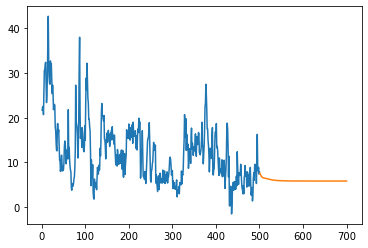

In [65]:
plt.plot(day_new,scaler.inverse_transform(df_na[7518:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(df_na[7518:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

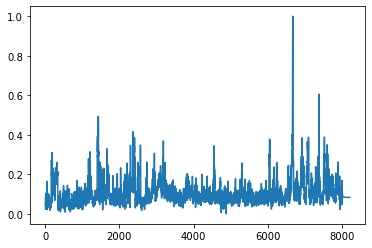

In [66]:
df3=df_na.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [67]:
df3=scaler.inverse_transform(df3).tolist()

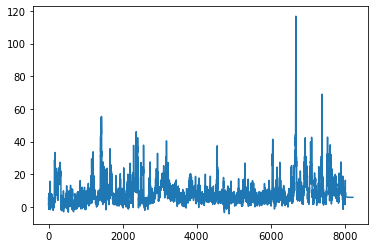

In [68]:
plt.plot(df3)

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# _, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
# _, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
# print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

In [ ]:

# import plotly.express as px
# fig = px.line(df3, y='pm2.5', title='pm2.5 with slider')

# fig.update_xaxes(
#     rangeslider_visible = True,
#     rangeselector=dict(
#         buttons=list([
#             dict(step="all")
#         ]
#         )))  
# fig.show()

### The end

## This was previous version

In [ ]:
# scaler.fit(train)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [ ]:
# scaled_train[:10]

In [ ]:
# from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# # define generator
#  n_input = 5
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# X,y = generator[0]
# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

In [ ]:
# X.shape

In [ ]:
# # We do the same thing, but now instead for 12 hours
# n_input = 3
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

In [ ]:
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
# model.summary()

In [ ]:
# fit model
# model.fit(generator,epochs=50)

In [ ]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
# last_train_batch = scaled_train[-12:]

In [ ]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
# model.predict(last_train_batch)

In [ ]:
# scaled_test[0]

In [ ]:
# test_predictions = []

# first_eval_batch = scaled_train[-n_input:]
# current_batch = first_eval_batch.reshape((1, n_input, n_features))

# for i in range(len(test)):
    
#     # get the prediction value for the first batch
#     current_pred = model.predict(current_batch)[0]
    
#     # append the prediction into the array
#     test_predictions.append(current_pred) 
    
#     # use the prediction to update the batch and remove the first value
#     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# test_predictions

In [ ]:
# test.head()

In [ ]:
# true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# test['Predictions'] = true_predictions

In [ ]:
# test.head()

In [ ]:
# test

In [ ]:
# test.plot(figsize=(14,5))

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse=sqrt(mean_squared_error(test['pm2.5'],test['Predictions']))
# print(rmse)